In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

In [2]:
# multi trend model data
multi_model = pd.read_csv(os.path.join("../", "Model Data", "multi_outcome_no_stock.csv"))
multi_model = multi_model.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Date'])
multi_model.dropna(inplace=True)
multi_model.sort_values(by='Search Date').head()

,Multi_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,instacart jobs,gig economy,stimmy,trump,biden,china,Current Hospitalized COVID-19 Patients,Total Doses Administered,Daily Increase,Number of Flights
752,0-549,2020-01-23,43,79,33,20,84,19,76,40,...,20,13,0,10,1,62,0.0,0.0,0.0,158666.0
751,0-549,2020-01-24,52,78,42,22,75,16,72,38,...,14,14,0,10,1,75,0.0,0.0,0.0,179441.0
750,0-549,2020-01-25,39,69,14,33,56,19,84,42,...,23,4,0,10,1,76,0.0,0.0,0.0,170708.0
749,0-549,2020-01-26,38,69,41,23,55,16,61,39,...,21,12,0,9,1,67,0.0,0.0,0.0,174865.0
748,0-549,2020-01-27,48,82,22,24,80,18,60,40,...,19,6,0,10,1,65,0.0,0.0,0.0,171934.0


In [3]:
x = multi_model.drop(["Multi_Class", "Search Date"], axis=1)
x.head()
y = multi_model["Multi_Class"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [5]:
# scale the data
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)

In [6]:
# transform the training and testing data by using the x_scaler and y_sclaler models
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

k: 1, Train/Test Score: 1.000/0.785
k: 3, Train/Test Score: 0.916/0.780
k: 5, Train/Test Score: 0.892/0.801
k: 7, Train/Test Score: 0.856/0.812
k: 9, Train/Test Score: 0.833/0.806
k: 11, Train/Test Score: 0.822/0.780
k: 13, Train/Test Score: 0.817/0.806
k: 15, Train/Test Score: 0.820/0.806
k: 17, Train/Test Score: 0.808/0.812
k: 19, Train/Test Score: 0.810/0.806


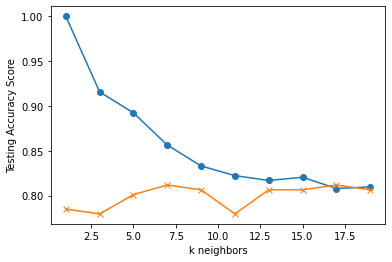

0.8096947935368043
0.8064516129032258


In [7]:
# loop through different k values to find which has the highest accuracy
# only odd numbers
train_scores =[]
test_scores = []
for k in range (1, 20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    train_score = knn.score(x_train_scaled, y_train)
    test_score = knn.score(x_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker='x')
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()
print(train_score)
print(test_score)

In [8]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train_scaled, y_train)
print('k=13 Test Acc: %.3f' %knn.score(x_test_scaled, y_test))

k=13 Test Acc: 0.806
